# Задача 1. Разведочный анализ

* **Дедлайн**: 08.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [ ] Считать данные и вывести их основные характеристики, описание признаков.
- [ ] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [ ] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [ ] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [ ] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [ ] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

# Датасет
В качестве датасета было решено взять [этот набор данных](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction).
В нем 300000 строк данных

## Атрибуты

1) Airline: название авиакомпании
2) Flight: полетный код самолета
3) Source City: город отправления
4) Departure Time: время отправления
5) Stops: количество остановок
6) Arrival Time: время прибытия
7) Destination City: город назначения
8) Class: класс посадочного места (бизнес или эконом)
9) Duration: длительность путешествия
10) Days Left: число дней до вылета
11) Price: целевая переменная, хранит цену билета

In [1]:
import numpy as np
import pandas as pd

import plotly
import plotly.express as px
import kaleido
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
sns.set_palette("viridis")

from sklearn.preprocessing import LabelEncoder

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/airline/airline.csv")

# Разведочный анализ данных (EDA)

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Пропущенные значения в датасете отсутствуют, поэтому никаких дополнительных манипуляций со строками не требуется.
Номер строки нас не интересует, поэтому сразу же удалим его.

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Средняя цена билетов 20889 при медиане 7425. Минимальная цена 1105, а максимальная 123071.
Средняя длительность поездки 11 с четвертью часов, а среднее количество дней до поездки равно 26.

In [7]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

7 из 10 нецелевых атрибутов являются категориальными и имеют малое число различных значений.

In [8]:
df.duplicated().sum()

0

In [9]:
pd.DataFrame({"Count of missing values" :df.isnull().sum()})

,Count of missing values
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


Среди взятых данных отсутствуют пропущенные или дублированные значения.

In [10]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

Indigo - самая популярная авиакомпания

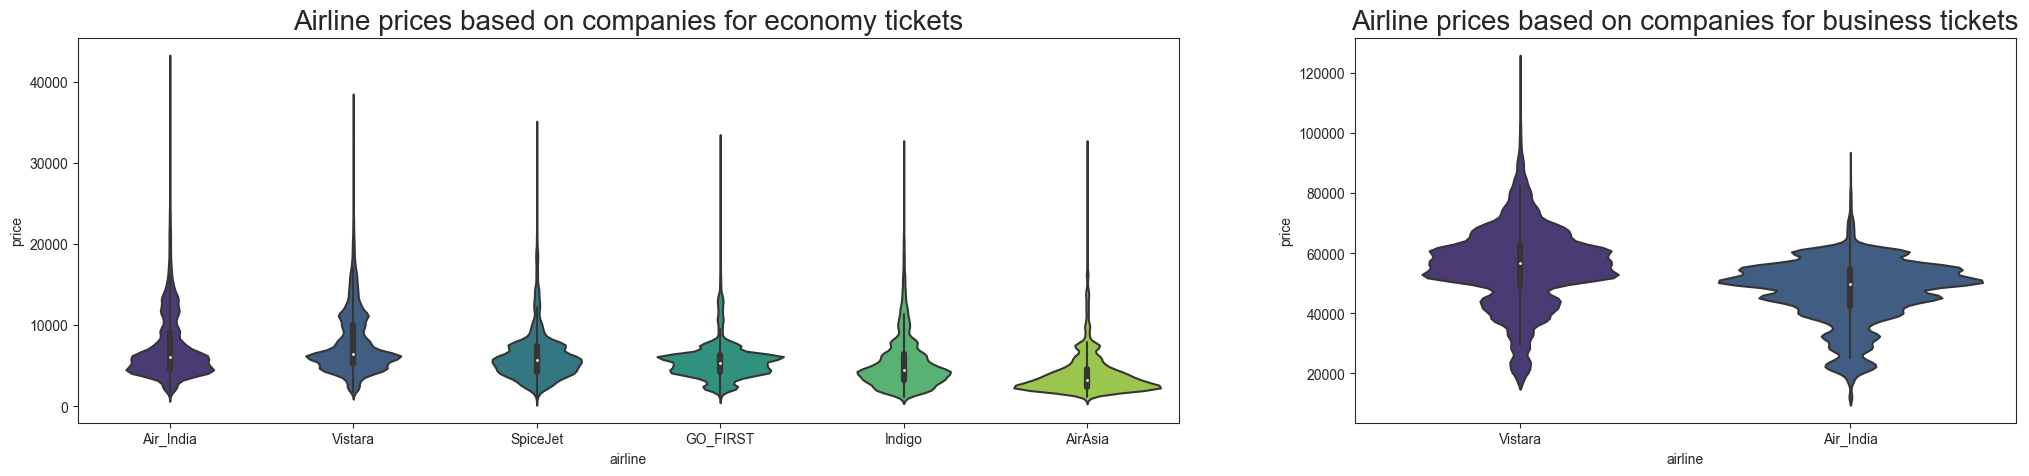

In [11]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(y = "price", x = "airline",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)
sns.violinplot(y = "price", x = "airline",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20);

Судя по графику, AirAsia самая бюджетная компания из всех, а AirIndia и Vistara наоборот, самые премиальные. Помимо наличия более дорогих билетов в эконом-класс, в последних двух авиакомпаниях продаются билеты и в бизнес-класс.

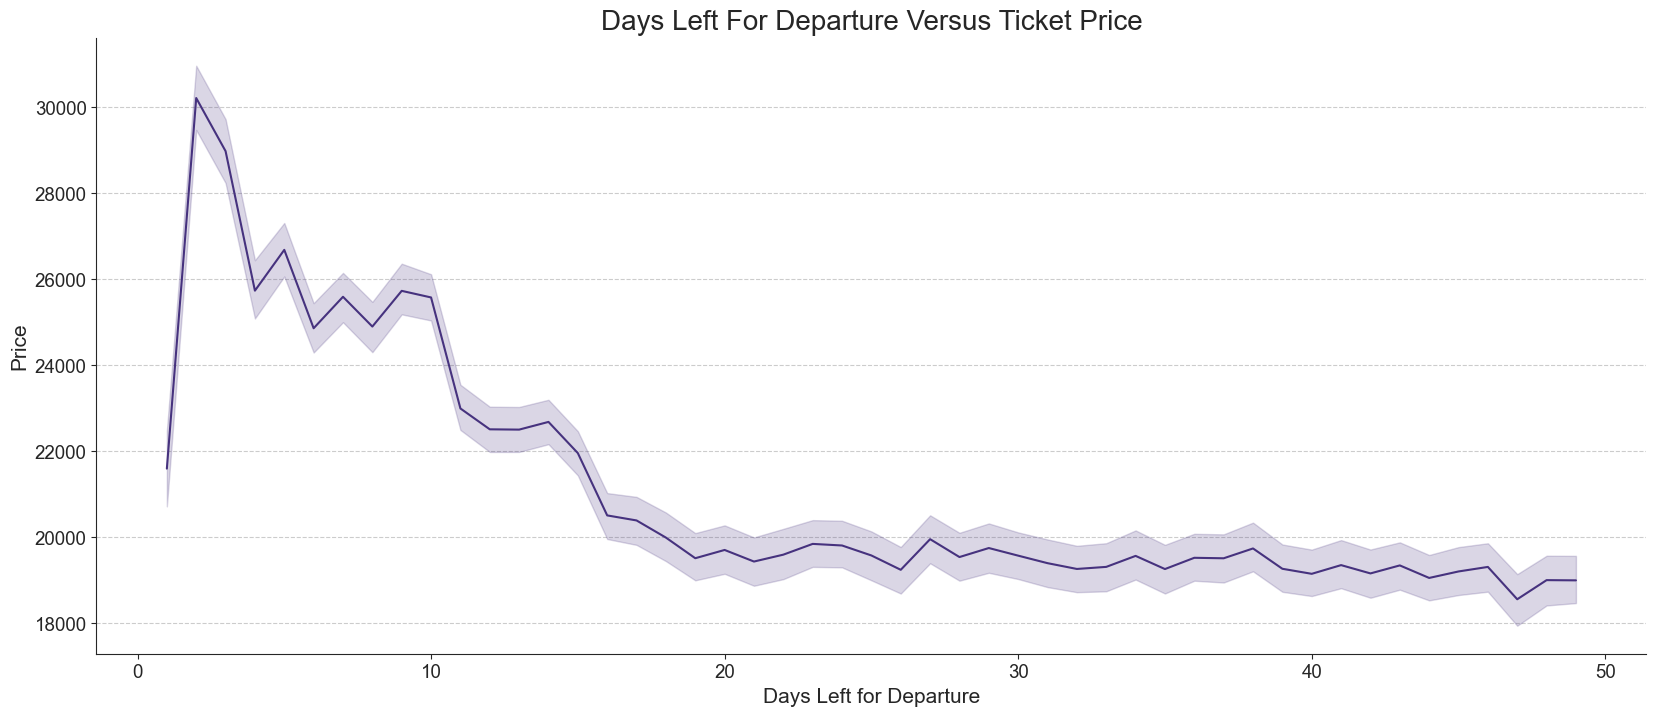

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=df, x='days_left', y='price', ax=ax)

ax.set_title('Days Left For Departure Versus Ticket Price', fontsize=20)
ax.set_xlabel('Days Left for Departure', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13.5)
ax.grid(axis='y', linestyle='--')
sns.despine()
plt.show()

Чем больше дней до вылета, тем дешевле билет. Самого пика цена достигает примерно за три дня до вылета, а за день-два билеты продаются сильно дешевле, примерно на уровне десяти дней до вылета. Видимо, таким образом авиакомпании распродают оставшиеся билеты, чтобы самолет не летел пустым.

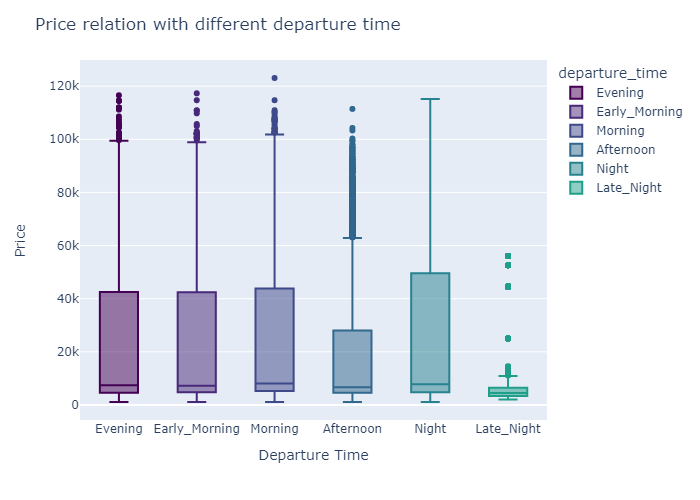

In [13]:
fig = px.box(df, x = 'departure_time', y = 'price', color = 'departure_time', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Price relation with different departure time', xaxis_title='Departure Time', yaxis_title='Price')
fig.show("png")

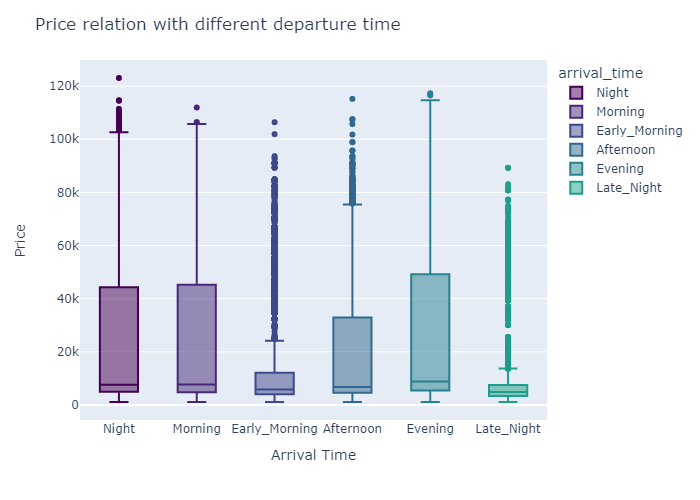

In [14]:
fig = px.box(df, x = 'arrival_time', y = 'price', color = 'arrival_time', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Price relation with different departure time', xaxis_title='Arrival Time', yaxis_title='Price')
fig.show("png")

Как можно заметить, рейсы с выездом или прибытием ночью или рано утром самые дешевые.

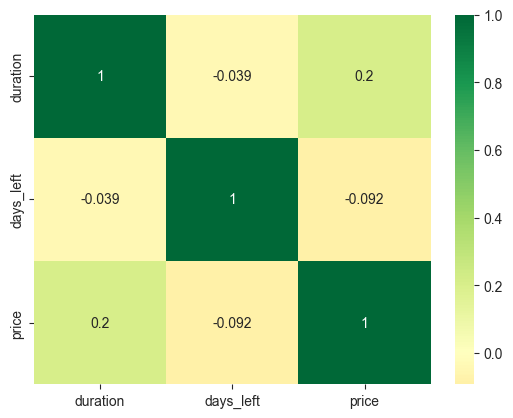

In [15]:
sns.heatmap(df.corr(), center=0, annot=True, cmap="RdYlGn");

Прослеживается довольно слабая коррелляция между длительностью полета и его стоимостью.

# Преобразование данных

In [16]:
le = LabelEncoder()
df = df.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


Все ячейки, данные которых представлены типом object, преобразуем в числа.

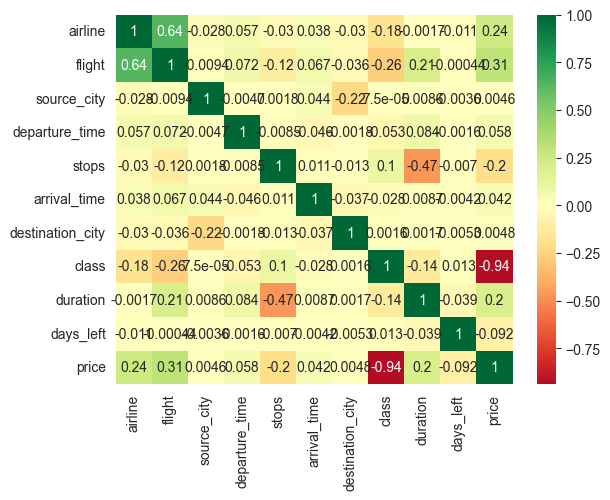

In [18]:
sns.heatmap(df.corr(), center=0, annot=True, cmap="RdYlGn");

После преобразований так же можно увидеть очень сильную зависимость между классом и ценой и более слабые зависимости цены от самолета, рейса и числа остановок.
Так же есть зависимость между длительностью полета и числом остановок, что довольно логично, время ожидания нередко больше времени перелета. Городом отправления и городом прилета, а так же много зависимостей от номера рейса и всех остальных столбцов. Можно предположить, что среди данных есть перелеты на один и тот же перелет, но в разные дни или за разное количество дней до вылета на один и тот же рейс.